In [203]:
import yfinance as yf 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import talib
import numpy as np 
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings('ignore')


# load data

In [3]:
aapl = yf.download('AAPL',start='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
data = aapl
data = data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,72.139961,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785912,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650803,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304405,108872000
...,...,...,...,...,...,...,...
615,2022-06-09,147.080002,147.949997,142.529999,142.639999,142.639999,69473000
616,2022-06-10,140.279999,140.759995,137.059998,137.130005,137.130005,91437900
617,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
618,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300


In [5]:
close_data = data['Close']
close_data

0       73.412498
1       75.087502
2       74.357498
3       74.949997
4       74.597504
          ...    
615    142.639999
616    137.130005
617    131.880005
618    132.759995
619    135.429993
Name: Close, Length: 620, dtype: float64

In [6]:
# 5 이동평균 
ma_5 = close_data.rolling(window=5).mean()
ma_5

0             NaN
1             NaN
2             NaN
3             NaN
4       74.481000
          ...    
615    146.166003
616    144.516003
617    141.664005
618    138.474002
619    135.967999
Name: Close, Length: 620, dtype: float64

In [7]:
# 20 이동평균 
ma_20 = close_data.rolling(window=20).mean()
ma_20

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
615    144.860502
616    144.589002
617    143.827502
618    143.188503
619    142.498002
Name: Close, Length: 620, dtype: float64

In [8]:
df= pd.DataFrame()
df['close'] = close_data
df['ma_5'] = ma_5
df['ma_20'] = ma_20
df.head(20)

,close,ma_5,ma_20
0,73.412498,NaN,NaN
1,75.087502,NaN,NaN
2,74.357498,NaN,NaN
3,74.949997,NaN,NaN
4,74.597504,74.481000,NaN
5,75.797501,74.958000,NaN
6,77.407501,75.422000,NaN
7,77.582497,76.067000,NaN
8,79.239998,76.925000,NaN
9,78.169998,77.639499,NaN


In [9]:
data['close'] = close_data
data['ma_5'] = ma_5
data['ma_20'] = ma_20
data.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,close,ma_5,ma_20
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,72.139961,100805600,73.412498,NaN,NaN
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785912,135480400,75.087502,NaN,NaN
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800,74.357498,NaN,NaN
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650803,118387200,74.949997,NaN,NaN
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304405,108872000,74.597504,74.481000,NaN
5,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483620,132079200,75.797501,74.958000,NaN
6,2020-01-09,76.809998,77.607498,76.550003,77.407501,76.065697,170108400,77.407501,75.422000,NaN
7,2020-01-10,77.650002,78.167503,77.062500,77.582497,76.237656,140644800,77.582497,76.067000,NaN
8,2020-01-13,77.910004,79.267502,77.787498,79.239998,77.866432,121532000,79.239998,76.925000,NaN
9,2020-01-14,79.175003,79.392502,78.042503,78.169998,76.814980,161954400,78.169998,77.639499,NaN


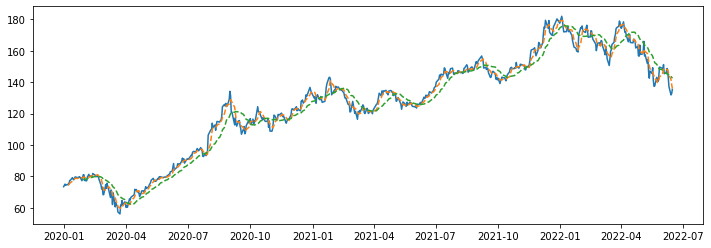

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(aapl.index, close_data, label='close_data')
plt.plot(aapl.index, ma_5, linestyle='dashed', label='ma_5')
plt.plot(aapl.index, ma_20, linestyle='dashed', label='ma_20')
plt.show()

In [11]:
def MA_short_long(ts, short = 5, long = 10):
    short_ts = talib.SMA(ts, short)[(long-1):]
    long_ts = talib.SMA(ts, long)[(long-1):]
    
    diff = short_ts-long_ts # 양수 음수 파악하겠다 이말인듯 . 
    change_idx = np.where(np.sign(diff.shift(1)[1:]) + np.sign(diff[1:]) == 0)[0] + 1
    output = diff[change_idx]
    output = pd.DataFrame(output, columns = ['value'])
    output.value = np.where(output.value >= 0, "buy", "sell")
    
    return output

In [12]:
# 골든 크로스 5이평이 20이평 돌파시 매수 
for i in range(len(df)):
    #초기값 잡기 
    if i==0:
        # 5이평이 20이평선 밑에 있으면 ,
        df.loc[i.'ma_5'] >= df.loc[i.'ma_20']
        df.loc
    if df['ma_5'][i] > df['ma_20'][i]:
        df.loc[i,'action'] = 'buy'
        df.loc[i.'state'] = 'holding' 
#         df.loc[i,'state'] = 'holding'
    elif df['ma_5'][i] > df['ma_20'][i]:
        df.loc[i,'action'] = 'sell'
#         df.loc[i,'state'] = 'holding'



SyntaxError: invalid syntax (833769916.py, line 6)

In [13]:
# 골든 크로스 5이평이 20이평 돌파시 매수 
for i in range(len(df)):
    # 5이평이 20이평선 밑에 았고
    if df.loc[i,'ma_5'] < df.loc[i,'ma_20']:
        df.loc[i,'ma_5'] < df.loc[i,'ma_20']
        

In [14]:
df[df['action'].isin(['buy', 'sell'])]

KeyError: 'action'

In [15]:
short_ts = talib.SMA(aapl['Close'],5)[9:]

In [16]:
long_ts=talib.SMA(aapl['Close'],10)[9:]

In [17]:
diff = short_ts-long_ts
diff

Date
2020-01-14    1.579250
2020-01-15    1.544499
2020-01-16    1.452749
2020-01-17    1.340250
2020-01-21    0.901500
                ...   
2022-06-09   -1.134999
2022-06-10   -2.120000
2022-06-13   -3.195999
2022-06-14   -4.778001
2022-06-15   -5.956003
Length: 611, dtype: float64

In [18]:
diff.shift(1)

Date
2020-01-14         NaN
2020-01-15    1.579250
2020-01-16    1.544499
2020-01-17    1.452749
2020-01-21    1.340250
                ...   
2022-06-09    0.791002
2022-06-10   -1.134999
2022-06-13   -2.120000
2022-06-14   -3.195999
2022-06-15   -4.778001
Length: 611, dtype: float64

In [19]:
change_idx = np.where(np.sign(diff.shift(1)[1:]) + np.sign(diff[1:]) == 0)[0] + 1
output = diff[change_idx]
output

Date
2020-01-31   -0.154501
2020-02-03    0.082749
2020-02-05   -0.154500
2020-02-07    0.246000
2020-02-20   -0.021500
                ...   
2022-04-06   -0.687003
2022-05-04    0.028999
2022-05-05   -0.380000
2022-05-27    0.687000
2022-06-09   -1.134999
Length: 65, dtype: float64

In [20]:
 np.where(np.sign(diff.shift(1)[1:]) + np.sign(diff[1:]) == 0)[0] + 1

array([ 12,  13,  15,  17,  25,  36,  39,  51,  57,  59,  69,  73, 132,
       138, 164, 179, 186, 187, 195, 207, 218, 223, 232, 233, 247, 257,
       265, 270, 274, 293, 299, 306, 322, 323, 324, 325, 326, 341, 347,
       353, 383, 385, 390, 394, 397, 399, 406, 409, 419, 439, 461, 466,
       488, 492, 500, 517, 524, 538, 541, 550, 562, 581, 582, 598, 606],
      dtype=int64)

In [21]:
def MA_short_long(ts, short = 5, long = 10):
    short_ts = talib.SMA(ts, short)[(long-1):]
    long_ts = talib.SMA(ts, long)[(long-1):]
    
    diff = short_ts-long_ts
    change_idx = np.where(np.sign(diff.shift(1)[1:]) + np.sign(diff[1:]) == 0)[0] + 1
    output = diff[change_idx]
    output = pd.DataFrame(output, columns = ['value'])
    output.value = np.where(output.value >= 0, "buy", "sell")
    
    return output

In [22]:
np.where(np.sign(diff.shift(1)[1:]) + np.sign(diff[1:]) == 0)[0] +

SyntaxError: invalid syntax (3114826646.py, line 1)

In [24]:
##데드 크로스 매도 
def deadcross(short_term_MA, long_term_MA):
    result = [False]
    for i in range(1, len(short_term_MA)):
        if (short_term_MA.iloc[i] <= long_term_MA.iloc[i]) and (short_term_MA.iloc[i-1] > long_term_MA.iloc[i-1]):
            result.append(True)
        else:
            result.append(False)
    
    return result


In [25]:
buy_idx = np.where(goldencross(ma_5,ma_20))[0]
sell_idx =np.where(deadcross(ma_5,ma_20))[0]

In [26]:
print(len(ma_5))
print(len(ma_20))


620
620


In [33]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,close,ma_5,ma_20
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,72.139961,100805600,73.412498,NaN,NaN
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785912,135480400,75.087502,NaN,NaN
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800,74.357498,NaN,NaN
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650803,118387200,74.949997,NaN,NaN
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304405,108872000,74.597504,74.481000,NaN
...,...,...,...,...,...,...,...,...,...,...
615,2022-06-09,147.080002,147.949997,142.529999,142.639999,142.639999,69473000,142.639999,146.166003,144.860502
616,2022-06-10,140.279999,140.759995,137.059998,137.130005,137.130005,91437900,137.130005,144.516003,144.589002
617,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,131.880005,141.664005,143.827502
618,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,132.759995,138.474002,143.188503


In [36]:
data.iloc[buy_idx,:]# # 골든 크로스 매수 시점 

Int64Index([68, 147, 190, 218, 232, 267, 305, 316, 362, 401, 407, 453, 475,
            527, 560, 610],
           dtype='int64')

68
147
190
218
232
267
305
316
362
401
407
453
475
527
560
610


In [32]:
data.iloc[sell_idx,:] # # 데드 크로스 매수 시점 

,Date,Open,High,Low,Close,Adj Close,Volume,close,ma_5,ma_20
36,2020-02-24,74.315002,76.044998,72.307503,74.544998,73.426674,222195200,74.544998,78.707498,79.636125
144,2020-07-28,94.367500,94.550003,93.247498,93.252502,92.102165,103625600,93.252502,94.159000,94.808374
174,2020-09-09,117.260002,119.139999,115.260002,117.320000,116.081703,176940500,117.320000,120.675998,121.253624
206,2020-10-23,116.389999,116.550003,114.279999,115.040001,113.825768,82572600,115.040001,116.230002,116.946000
229,2020-11-25,115.550003,116.750000,115.169998,116.029999,115.003380,76499200,116.029999,116.205998,116.252999
260,2021-01-12,128.500000,129.690002,126.860001,128.800003,127.660385,91951100,128.800003,129.470000,130.080500
282,2021-02-12,134.350006,135.529999,133.690002,135.369995,134.372742,60145100,135.369995,135.762000,135.808000
308,2021-03-23,123.330002,124.239998,122.139999,122.540001,121.637276,95467100,122.540001,122.242000,122.265499
337,2021-05-04,131.190002,131.490005,126.699997,127.849998,126.908142,137564700,127.849998,131.781999,132.667500
399,2021-08-02,146.360001,146.949997,145.250000,145.520004,144.693359,62880000,145.520004,145.754001,145.811000


In [31]:
data.iloc[67:70,:]

,Date,Open,High,Low,Close,Adj Close,Volume,close,ma_5,ma_20
67,2020-04-07,67.699997,67.925003,64.750000,64.857498,63.884510,202887200,64.857498,62.4575,62.482375
68,2020-04-08,65.684998,66.842499,65.307503,66.517502,65.519600,168895200,66.517502,63.7155,62.365375
69,2020-04-09,67.175003,67.517502,66.175003,66.997498,65.992386,161834800,66.997498,64.8685,62.612375


In [36]:
np.where(goldencross(ma_5,ma_20))[0]

array([ 68, 147, 190, 218, 232, 267, 305, 316, 362, 401, 407, 453, 475,
       527, 560, 610], dtype=int64)

In [34]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,close,ma_5,ma_20
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,72.139961,100805600,73.412498,NaN,NaN
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785912,135480400,75.087502,NaN,NaN
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800,74.357498,NaN,NaN
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650803,118387200,74.949997,NaN,NaN
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304405,108872000,74.597504,74.481,NaN


# 트레이딩 

In [49]:
# 콜든 크로스 매수 
def goldencross(short_term_MA, long_term_MA):
    result = [False]
    for i in range(1, len(short_term_MA)):
        if (short_term_MA.iloc[i] >= long_term_MA.iloc[i]) and (short_term_MA.iloc[i-1] < long_term_MA.iloc[i-1]):
            result.append(True)
        else:
            result.append(False)
    
    return result


##데드 크로스 매도 
def deadcross(short_term_MA, long_term_MA):
    result = [False]
    for i in range(1, len(short_term_MA)):
        if (short_term_MA.iloc[i] <= long_term_MA.iloc[i]) and (short_term_MA.iloc[i-1] > long_term_MA.iloc[i-1]):
            result.append(True)
        else:
            result.append(False)
    
    return result

In [97]:
for k in range(len(data)):
    if k in buy_idx:
        data.loc[k,'action'] = 'buy'
    elif k in sell_idx:
        data.loc[k,'action'] = 'sell'
    else:
        data.loc[k,'action'] = ''
        
        
data    

,Date,Open,High,Low,Close,Adj Close,Volume,close,ma_5,ma_20,action
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,72.139961,100805600,73.412498,NaN,NaN,
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785912,135480400,75.087502,NaN,NaN,
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800,74.357498,NaN,NaN,
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650803,118387200,74.949997,NaN,NaN,
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304405,108872000,74.597504,74.481000,NaN,
...,...,...,...,...,...,...,...,...,...,...,...
615,2022-06-09,147.080002,147.949997,142.529999,142.639999,142.639999,69473000,142.639999,146.166003,144.860502,
616,2022-06-10,140.279999,140.759995,137.059998,137.130005,137.130005,91437900,137.130005,144.516003,144.589002,sell
617,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,131.880005,141.664005,143.827502,
618,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,132.759995,138.474002,143.188503,


,Date,Open,High,Low,Close,Adj Close,Volume,close,ma_5,ma_20,action
60,2020-03-27,63.187500,63.967499,61.762501,61.935001,61.005844,204216800,61.935001,61.147501,65.808375,
61,2020-03-30,62.685001,63.880001,62.349998,63.702499,62.746826,167976400,63.702499,62.669501,65.258375,
62,2020-03-31,63.900002,65.622498,63.000000,63.572498,62.618774,197002000,63.572498,63.040000,64.820500,
63,2020-04-01,61.625000,62.180000,59.782501,60.227501,59.323967,176218400,60.227501,62.809500,64.047625,
64,2020-04-02,60.084999,61.287498,59.224998,61.232498,60.313885,165934000,61.232498,62.134000,63.447750,
65,2020-04-03,60.700001,61.424999,59.742500,60.352501,59.447086,129880000,60.352501,61.817500,62.852500,
66,2020-04-06,62.724998,65.777496,62.345001,65.617500,64.633102,201820400,65.617500,62.200500,62.806250,
67,2020-04-07,67.699997,67.925003,64.750000,64.857498,63.884510,202887200,64.857498,62.457500,62.482375,
68,2020-04-08,65.684998,66.842499,65.307503,66.517502,65.519600,168895200,66.517502,63.715500,62.365375,buy
69,2020-04-09,67.175003,67.517502,66.175003,66.997498,65.992386,161834800,66.997498,64.868500,62.612375,


In [80]:
def get_profit(df):
    final_df = df[df['action'].isin(['buy','sell'])]
    final_df = final_df.reset_index(drop=True)
    trading_cnt = final_df.shape[0]
    
    profit = []
    for idx in range(len(final_df)):
        # 매수 action이 들어올 경우 매수 
        if final_df.action[idx] =='buy':
            buy_price = final_df.Close[idx]
        # 첫 action이 매도인 경우
        elif idx == 0 and final_df.action[idx] =='sell':
            continue
        #그 외의 경우 정상 매도 
        else:
            sell_price = final_df.Close[idx]
            profit.append(buy_price - sell_price)
       
    profit_sum = np.sum(profit)
    profit_num = len(profit)
    
    return trading_cnt,profit_sum,profit_num
    

    

In [70]:
final_df.action

36     sell
68      buy
144    sell
147     buy
174    sell
190     buy
206    sell
218     buy
229    sell
232     buy
260    sell
267     buy
282    sell
305     buy
308    sell
316     buy
337    sell
362     buy
399    sell
401     buy
405    sell
407     buy
430    sell
453     buy
472    sell
475     buy
511    sell
527     buy
540    sell
560     buy
575    sell
610     buy
616    sell
Name: action, dtype: object

In [81]:
get_profit(data)

(33, -55.0050048828125, 16)

* 국내 데이터적용 

In [171]:
df_krx = fdr.StockListing('KRX')
df_krx.head(20)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [197]:
df_krx = df_krx.dropna()
df_krx.head(40)


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
54,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
55,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
56,032790,KOSDAQ,BNGT,기계장비 및 관련 물품 도매업,"Bio 이종장기 사업, ICT 프린터 현상기",1997-06-26,12월,조상환,http://www.mgenplus.com,서울특별시
57,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시


In [209]:
# symbol를 구하고 , 개별 주식의 데이터 ma 5 + ma_20 구하고 ,
sym_name_lst=df_krx[['Symbol','Name','Sector','Industry']]
sym_name_lst.head()


,Symbol,Name,Sector,Industry
0,060310,3S,전자부품 제조업,반도체 웨이퍼 캐리어
1,095570,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)"
2,006840,AK홀딩스,기타 금융업,지주사업
3,054620,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션
4,265520,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비


In [92]:
# data_load
raw_df=fdr.DataReader('060310','2021')
raw_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,2185,2320,2135,2260,588133,0.043880
2021-01-05,2270,2285,2200,2250,410263,-0.004425
2021-01-06,2225,2310,2215,2290,570349,0.017778
2021-01-07,2290,2340,2240,2290,519777,0.000000
2021-01-08,2300,2315,2225,2245,462568,-0.019651
...,...,...,...,...,...,...
2022-06-10,3150,3370,3135,3195,1452172,0.012678
2022-06-13,3085,3135,2990,3000,493079,-0.061033
2022-06-14,2860,2985,2860,2895,483227,-0.035000


In [95]:
raw_df['ma_5'] = raw_df['Close'].rolling(window=5).mean()
ma_5 = raw_df['ma_5']
raw_df['ma_20'] = raw_df['Close'].rolling(window=20).mean()
ma_20 = raw_df['ma_20']

raw_df

,Open,High,Low,Close,Volume,Change,ma_5,ma_20
Date,,,,,,,,
2021-01-04,2185,2320,2135,2260,588133,0.043880,NaN,NaN
2021-01-05,2270,2285,2200,2250,410263,-0.004425,NaN,NaN
2021-01-06,2225,2310,2215,2290,570349,0.017778,NaN,NaN
2021-01-07,2290,2340,2240,2290,519777,0.000000,NaN,NaN
2021-01-08,2300,2315,2225,2245,462568,-0.019651,2267.0,NaN
...,...,...,...,...,...,...,...,...
2022-06-10,3150,3370,3135,3195,1452172,0.012678,3238.0,3224.75
2022-06-13,3085,3135,2990,3000,493079,-0.061033,3170.0,3226.75
2022-06-14,2860,2985,2860,2895,483227,-0.035000,3099.0,3222.00


In [98]:
# 콜든 크로스 매수 
def goldencross(short_term_MA, long_term_MA):
    result = [False]
    for i in range(1, len(short_term_MA)):
        if (short_term_MA.iloc[i] >= long_term_MA.iloc[i]) and (short_term_MA.iloc[i-1] < long_term_MA.iloc[i-1]):
            result.append(True)
        else:
            result.append(False)
    
    return result


##데드 크로스 매도 
def deadcross(short_term_MA, long_term_MA):
    result = [False]
    for i in range(1, len(short_term_MA)):
        if (short_term_MA.iloc[i] <= long_term_MA.iloc[i]) and (short_term_MA.iloc[i-1] > long_term_MA.iloc[i-1]):
            result.append(True)
        else:
            result.append(False)
    
    return result

In [ ]:
buy_idx = np.where(goldencross(ma_5,ma_20))[0]
sell_idx =np.where(deadcross(ma_5,ma_20))[0]

In [ ]:
for k in range(len(data)):
    if k in buy_idx:
        data.loc[k,'action'] = 'buy'
    elif k in sell_idx:
        data.loc[k,'action'] = 'sell'
    else:
        data.loc[k,'action'] = ''

In [252]:
def get_profit(df):
    final_df = df[df['action'].isin(['buy','sell'])]
    final_df = final_df.reset_index(drop=True)
    trading_cnt = final_df.shape[0]
    
    profit = []
    buy_lst = []
    for idx in range(len(final_df)):
        # 매수 action이 들어올 경우 매수 
        if final_df.action[idx] =='buy':
            buy_price = final_df.Close[idx]
            buy_lst.append(buy_price)
        # 첫 action이 매도인 경우
        elif idx == 0 and final_df.action[idx] =='sell':
            continue
        #그 외의 경우 정상 매도 
        else:
            sell_price = final_df.Close[idx]
            profit.append(-(buy_price) + sell_price) # 음수가 되어야함. 
            # 1 buy_pirce > sell_preice 인경우 비싸게 싸서 싸게 판경우 즉 손실 
            # 2 buy_pirce < sell_preice 인 경우 싸게사서 비싸게 판경우 그래서 이득 
       
    profit_sum = np.sum(profit)
    average_buying = np.mean(buy_lst) # 매수 평단가 
    profit_percentage = round(profit_sum/average_buying,2)
    profit_num = len(profit)
    
    return trading_cnt,profit_sum,profit_num,profit_percentage
    

    

In [253]:
get_profit(raw_df)

(4, -7350, 2, -0.76)

In [254]:
def get_profit_2(symbol,year):
    raw_df=fdr.DataReader(symbol,year).reset_index()
    
    raw_df['ma_5'] = raw_df['Close'].rolling(window=5).mean()
    ma_5 = raw_df['ma_5']
    raw_df['ma_20'] = raw_df['Close'].rolling(window=20).mean()
    ma_20 = raw_df['ma_20']
    
    buy_idx = np.where(goldencross(ma_5,ma_20))[0]
    sell_idx =np.where(deadcross(ma_5,ma_20))[0]
    
    for k in range(len(raw_df)):
        if k in buy_idx:
            raw_df.loc[k,'action'] = 'buy'
        elif k in sell_idx:
            raw_df.loc[k,'action'] = 'sell'
        else:
            raw_df.loc[k,'action'] = ''

    rst_df = raw_df.copy()
    
    rst = get_profit(rst_df)
    return rst
    
    
    
    
    

In [194]:
get_profit_2('060310','2022-03-10') # 윤석열 당선일 

(3, 355, 1, 0.11)

In [148]:
raw_df=fdr.DataReader('060310','2022-03').reset_index()

raw_df['ma_5'] = raw_df['Close'].rolling(window=5).mean()
ma_5 = raw_df['ma_5']
raw_df['ma_20'] = raw_df['Close'].rolling(window=20).mean()
ma_20 = raw_df['ma_20']

buy_idx = np.where(goldencross(ma_5,ma_20))[0]
sell_idx =np.where(deadcross(ma_5,ma_20))[0]

for k in range(len(raw_df)):
    if k in buy_idx:
        raw_df.loc[k,'action'] = 'buy'
    elif k in sell_idx:
        raw_df.loc[k,'action'] = 'sell'
    else:
        raw_df.loc[k,'action'] = ''

rst_df = raw_df.copy()

rst = get_profit(rst_df)

In [193]:
raw_df=fdr.DataReader('060310','2022-03-10').reset_index()
raw_df

,Date,Open,High,Low,Close,Volume,Change
0,2022-03-10,3105,3215,3105,3190,128473,0.032362
1,2022-03-11,3180,3205,3130,3200,123242,0.003135
2,2022-03-14,3200,3255,3150,3170,165570,-0.009375
3,2022-03-15,3200,3225,3145,3165,54879,-0.001577
4,2022-03-16,3185,3230,3160,3185,148340,0.006319
...,...,...,...,...,...,...,...
63,2022-06-10,3150,3370,3135,3195,1452172,0.012678
64,2022-06-13,3085,3135,2990,3000,493079,-0.061033
65,2022-06-14,2860,2985,2860,2895,483227,-0.035000
66,2022-06-15,2880,2925,2750,2815,370354,-0.027634


In [255]:
# lst_value =
lst = []
lst_2 = []
lst_per =[]
lst_sector =[]
lst_industry =[]
percent = []
for idx, idx_Name,idx_sector,idx_industry in zip(sym_name_lst.Symbol,sym_name_lst.Name,sym_name_lst.Sector,sym_name_lst.Industry):
    rst = get_profit_2(idx,'2022-03-10')[1]
    rst_2 = get_profit_2(idx,'2022-03-10')[3]
    lst_per.append(rst_2)
    
    lst.append(rst)
    name =idx_Name
    lst_2.append(name)
    lst_sector.append(idx_sector)
    lst_industry.append(idx_industry)
    
    

SSLError: HTTPSConnectionPool(host='fchart.stock.naver.com', port=443): Max retries exceeded with url: /sise.nhn?timeframe=day&count=6000&requestType=0&symbol=066570 (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1125)')))

In [169]:
sym_name_lst.Symbol[:20]

0     060310
1     095570
2     006840
3     054620
4     265520
5     211270
54    027410
55    282330
56    032790
57    138930
58    001460
60    013720
61    001040
62    079160
63    035760
64    311690
66    000120
67    011150
70    097950
72    051500
Name: Symbol, dtype: object

In [162]:
rst

-9150

In [188]:
lst

[-205,
 -875,
 -4100,
 -760,
 5500,
 -2900,
 800,
 8500,
 0.0,
 -290,
 58500,
 2075,
 8000,
 1050,
 9100,
 -650,
 27500,
 1040,
 40000,
 -9150,
 640,
 -400,
 0.0,
 -455,
 1215,
 -4300,
 63,
 210,
 -10700,
 2400,
 -820,
 -4366,
 37900,
 3200,
 2420,
 95,
 -280,
 -990,
 -2315,
 -3450]

In [215]:
lst_2

['디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',
 '디에스케이',


In [201]:
import os
os.getcwd()

'C:\\Windows\\[2380861]python38_64bit_base\\notebooks\\technical_analysis'

In [256]:
output= pd.DataFrame({'name':lst_2,'profit':lst,'percnet':lst_per,'sector':lst_sector,'industry':lst_industry})
output.to_csv('C:\\Windows\\[2380861]python38_64bit_base\\notebooks\\technical_analysis\\output.csv',encoding='utf-8-sig',index=False)

In [177]:
fdr.DataReader('060310','2021') # cj프레시웨이 

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,2185,2320,2135,2260,588133,0.043880
2021-01-05,2270,2285,2200,2250,410263,-0.004425
2021-01-06,2225,2310,2215,2290,570349,0.017778
2021-01-07,2290,2340,2240,2290,519777,0.000000
2021-01-08,2300,2315,2225,2245,462568,-0.019651
...,...,...,...,...,...,...
2022-06-10,3150,3370,3135,3195,1452172,0.012678
2022-06-13,3085,3135,2990,3000,493079,-0.061033
2022-06-14,2860,2985,2860,2895,483227,-0.035000


In [220]:
sym_name_lst[sym_name_lst['Name']=='HLB사이언스']

,Symbol,Name,Sector,Industry
175,343090,HLB사이언스,의료용품 및 기타 의약 관련제품 제조업,"패혈증 치료제, 면역항암제 전달기술 등"


In [224]:
raw_df=fdr.DataReader('343090','2022-03-01').reset_index()
raw_df

,Date,Open,High,Low,Close,Volume,Change,ma_5,ma_20,action
0,2022-03-02,15100,15100,14500,14750,1137,-0.010067,NaN,NaN,
1,2022-03-03,14750,14950,14400,14400,4435,-0.023729,NaN,NaN,
2,2022-03-04,15000,15000,14350,14650,1093,0.017361,NaN,NaN,
3,2022-03-07,14200,14650,13850,14200,2000,-0.030717,NaN,NaN,
4,2022-03-08,15000,15000,13700,14250,365,0.003521,14450.0,NaN,
...,...,...,...,...,...,...,...,...,...,...
68,2022-06-10,5080,5330,4930,5230,2269,0.029528,5049.0,5349.00,
69,2022-06-13,5070,5220,4805,4990,9018,-0.045889,5039.0,5358.50,
70,2022-06-14,5080,5180,4715,4905,4035,-0.017034,5020.0,5342.25,
71,2022-06-15,5100,5100,4600,4735,10223,-0.034659,4988.0,5330.25,


In [234]:
raw_df=fdr.DataReader('343090','2022-03').reset_index()

raw_df['ma_5'] = raw_df['Close'].rolling(window=5).mean()
ma_5 = raw_df['ma_5']
raw_df['ma_20'] = raw_df['Close'].rolling(window=20).mean()
ma_20 = raw_df['ma_20']

buy_idx = np.where(goldencross(ma_5,ma_20))[0]
sell_idx =np.where(deadcross(ma_5,ma_20))[0]

for k in range(len(raw_df)):
    if k in buy_idx:
        raw_df.loc[k,'action'] = 'buy'
    elif k in sell_idx:
        raw_df.loc[k,'action'] = 'sell'
    else:
        raw_df.loc[k,'action'] = ''

rst_df = raw_df.copy()

rst_df


,Date,Open,High,Low,Close,Volume,Change,ma_5,ma_20,action
0,2022-03-02,15100,15100,14500,14750,1137,-0.010067,NaN,NaN,
1,2022-03-03,14750,14950,14400,14400,4435,-0.023729,NaN,NaN,
2,2022-03-04,15000,15000,14350,14650,1093,0.017361,NaN,NaN,
3,2022-03-07,14200,14650,13850,14200,2000,-0.030717,NaN,NaN,
4,2022-03-08,15000,15000,13700,14250,365,0.003521,14450.0,NaN,
...,...,...,...,...,...,...,...,...,...,...
68,2022-06-10,5080,5330,4930,5230,2269,0.029528,5049.0,5349.00,
69,2022-06-13,5070,5220,4805,4990,9018,-0.045889,5039.0,5358.50,
70,2022-06-14,5080,5180,4715,4905,4035,-0.017034,5020.0,5342.25,
71,2022-06-15,5100,5100,4600,4735,10223,-0.034659,4988.0,5330.25,


In [247]:
a = rst_df[rst_df['action'].isin(['sell','buy'])].reset_index(drop=True)
print(a['Close'][0])
print(a['Close'][1])
print(a['Close'][2])
print(a['Close'][3])



13750
6870
5650
5180


In [236]:
rst_df[28:65]

,Date,Open,High,Low,Close,Volume,Change,ma_5,ma_20,action
28,2022-04-12,0,0,0,13750,0,0.000000,13750.0,13752.50,
29,2022-04-13,0,0,0,13750,0,0.000000,13750.0,13737.50,buy
30,2022-04-14,0,0,0,13750,0,0.000000,13750.0,13745.00,
31,2022-04-15,0,0,0,13750,0,0.000000,13750.0,13740.00,
32,2022-04-18,0,0,0,13750,0,0.000000,13750.0,13742.50,
33,2022-04-19,0,0,0,13750,0,0.000000,13750.0,13732.50,
34,2022-04-20,0,0,0,13750,0,0.000000,13750.0,13730.00,
35,2022-04-21,0,0,0,13750,0,0.000000,13750.0,13725.00,
36,2022-04-22,0,0,0,13750,0,0.000000,13750.0,13715.00,
37,2022-04-25,0,0,0,13750,0,0.000000,13750.0,13710.00,


In [237]:
get_profit(rst_df)

(4, 7350, 2, 0.76)

In [239]:
rst_df.Close[0]

14750